# Analysing twitter emotion stream

Very similar as last notebook, this will analize emotions in every tweet instead of the sentimet score.

In [55]:
from tweepy.streaming import StreamListener
from tweepy import Stream
from tweepy import OAuthHandler

import json
from csv import DictReader
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

### Import keys
These are my personal keys, not included in this file.

In [2]:
import myKeys

api_key = myKeys.api_key
api_secret = myKeys.api_secret
access_token_key = myKeys.access_token_key
access_token_secret = myKeys.access_token_secret

### Load emotion lexicon
Open dictionary in same folder called `dict.csv`

In [3]:
cols = ['anger', 'anticipation', 'disgust', 'fear',
        'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

dictFile  = 'dict.csv'
mainDict = {}
with open(dictFile) as csvFile:
        reader = DictReader(csvFile)
        for row in reader:
            mainDict[row['Word']] = [int(row[i]) for i in cols]

### Create a listener to handle everey tweet

This class defines a handler for the tweet event. This class is the spine of this exploration's processing. It receives every tweet and loads it from the json format, along with the tweet emotion vector into a pandas DataFrame.

In [11]:
class ColorListener(StreamListener):

    def __init__(self):
        self.tweets = pd.DataFrame(columns=('tweet', 'anger', 'anticipation',
                'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'))

    def on_data(self, data):
        try:
            tweet = json.loads(data)
            vector = self.score(tweet)
            print vector
            row = pd.Series([tweet['text']]+vector, index=['tweet', 'anger', 'anticipation',
                'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'])
            self.tweets = self.tweets.append(row, ignore_index=True)
        except UnboundLocalError:
            raise UnboundLocalError # Tweet doesn't have text
        except:
            pass
        return True

    def score(self, tweet):
        line = tweet['text'].replace('.','').replace(',','').replace(';','').replace(':','').replace('\t',' ').replace('\n',' ')
        words = line.split(' ')
        score = [0] * 10
        for word in words:
            if word in mainDict:
                for i in range(len(score)):
                    score[i] += mainDict[word][i]
        return score

    def on_error(self, status):
        print "Error: ", status

### Instance and running

The listener object is created and hooked to the twitter stream with the proper authentication. The stream is later filtered with a specific search term (and tweet language), which is selected to represent a specific social phenomena.

**This cell must be stopped from the toolbar** otherwise it will feed from the tweeter stream without stop. 

In [27]:
cListener = ColorListener()
auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)

stream = Stream(auth, cListener)

# Start reading stream for english tweets with the color words
stream.filter(languages=['en'], track=['red', 'green','blue'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 2, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[0, 1, 0, 0, 1, 0, 4, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0

KeyboardInterrupt: 

### Analize the DataFrame

Now we have a pandas dataframe inside the cListener object we can analyze.

In [94]:
df = cListener.tweets
print len(df.index) # Number of rows

239


In [29]:
df.head() # How the data looks like

,tweet,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,RT @__KvngMyMy: Y'all need another gf🙄 ? http...,0,0,0,0,0,0,0,0,0,0
1,@GStuedler I think America is beginning to tur...,0,0,0,0,0,0,0,0,0,0
2,"Guinness lovers, unite ‼️ 🍀🇨🇮💚 #love #StPa...",0,0,0,0,0,0,0,0,0,0
3,RT @NASA: Two of our radios are aboard @ESA's ...,0,1,0,1,1,0,1,0,0,0
4,RT @5REDVELVET: [!!] Visit @SupportRV &amp; fo...,0,0,0,0,0,0,0,0,0,0


In [34]:
df['anger'].dtype

dtype('float64')

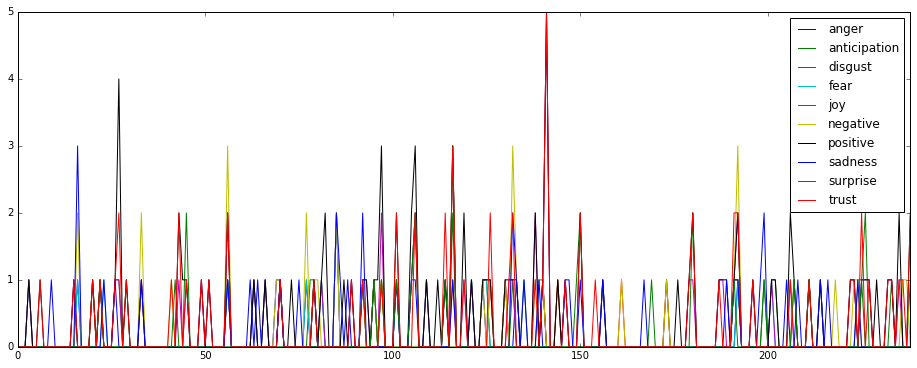

In [69]:
df.plot(figsize=(16, 6)) # Plot the sentiment as a time series

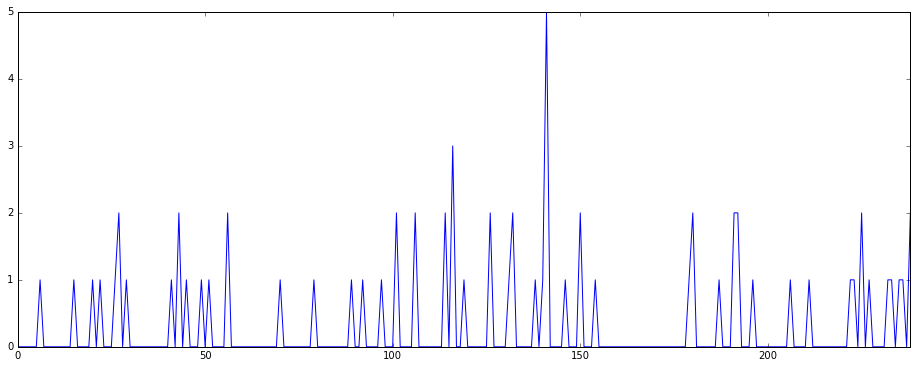

In [68]:
df['trust'].plot(figsize=(16, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119ec4950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115479750>], dtype=object)

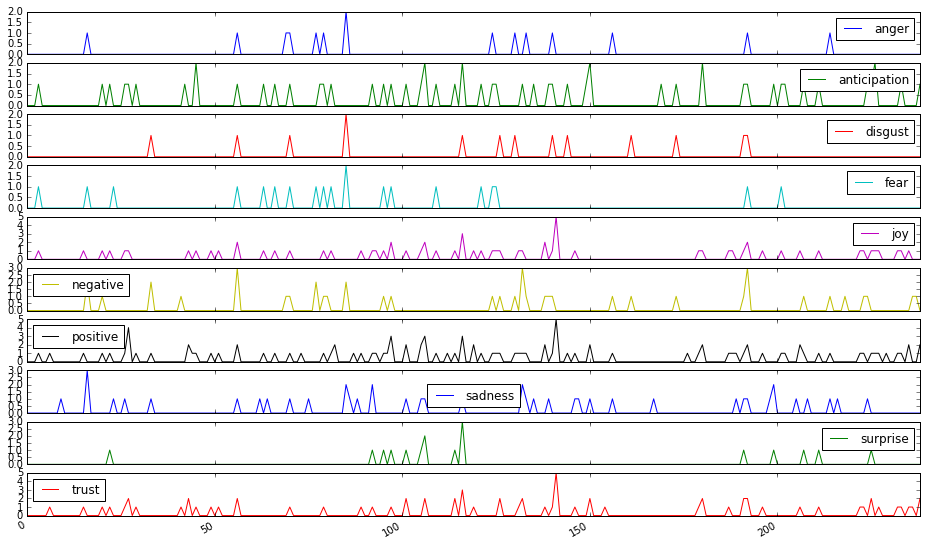

In [63]:
df.plot(subplots=True, figsize=(16, 10))

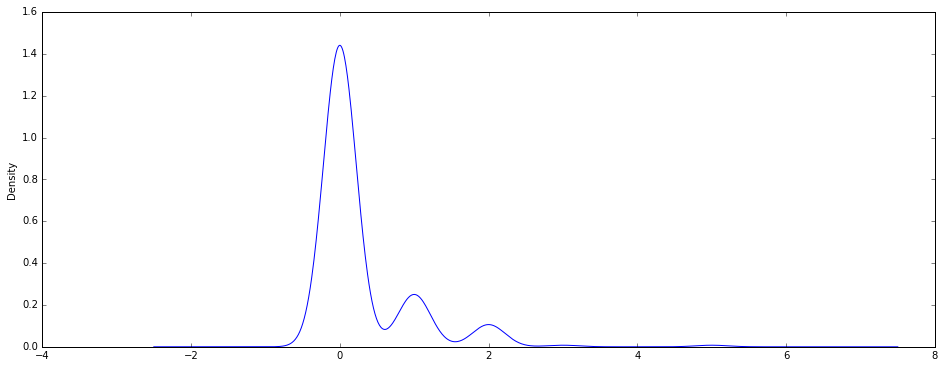

In [67]:
df['trust'].plot.kde(figsize=(16, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bc3eb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fba14d0>]], dtype=object)

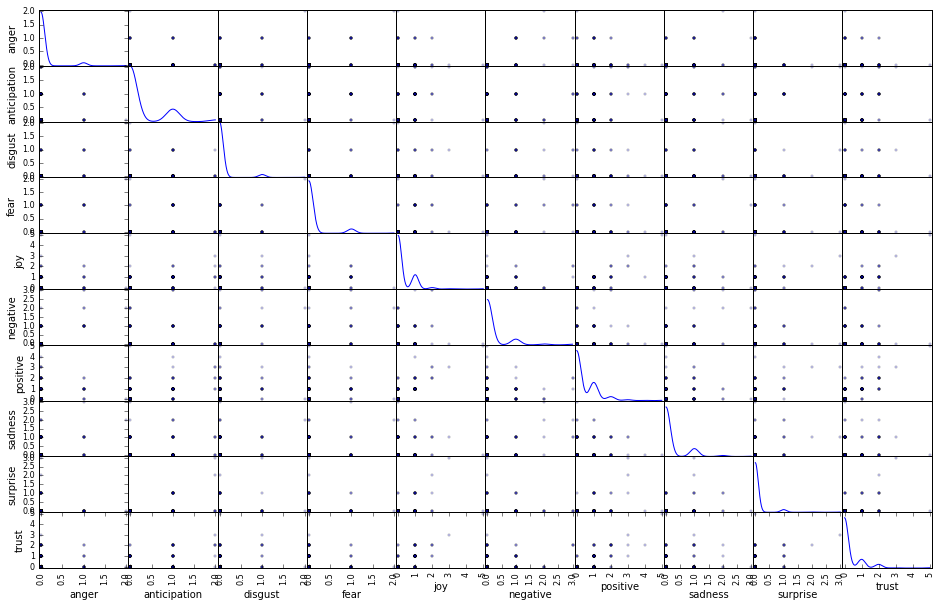

In [70]:
pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='kde')

In [48]:
df.sum()

tweet           RT @__KvngMyMy: Y'all need another gf🙄 ? http...
anger                                                          15
anticipation                                                   55
disgust                                                        14
fear                                                           20
joy                                                            67
negative                                                       43
positive                                                      103
sadness                                                        43
surprise                                                       17
trust                                                          69
dtype: object

In [51]:
cor = df.corr()
cor

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
anger,1.000000,0.086257,0.520163,0.539372,0.103194,0.647244,0.119061,0.366247,-0.054586,0.065612
anticipation,0.086257,1.000000,0.201182,0.312843,0.481614,0.192455,0.517920,0.233946,0.503049,0.442537
disgust,0.520163,0.201182,1.000000,0.331809,0.197884,0.540446,0.176236,0.273572,0.158084,0.226463
fear,0.539372,0.312843,0.331809,1.000000,0.299541,0.436452,0.198454,0.233904,0.026257,0.026783
joy,0.103194,0.481614,0.197884,0.299541,1.000000,0.221993,0.827676,0.107832,0.429705,0.801277
negative,0.647244,0.192455,0.540446,0.436452,0.221993,1.000000,0.192361,0.423460,0.024659,0.233880
positive,0.119061,0.517920,0.176236,0.198454,0.827676,0.192361,1.000000,0.128554,0.400661,0.783257
sadness,0.366247,0.233946,0.273572,0.233904,0.107832,0.423460,0.128554,1.000000,0.261179,0.162583
surprise,-0.054586,0.503049,0.158084,0.026257,0.429705,0.024659,0.400661,0.261179,1.000000,0.405727
trust,0.065612,0.442537,0.226463,0.026783,0.801277,0.233880,0.783257,0.162583,0.405727,1.000000


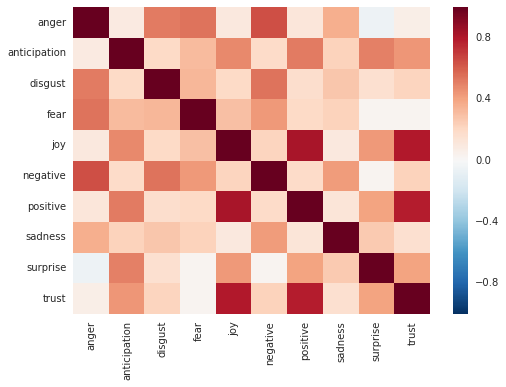

In [79]:
sns.heatmap(cor)

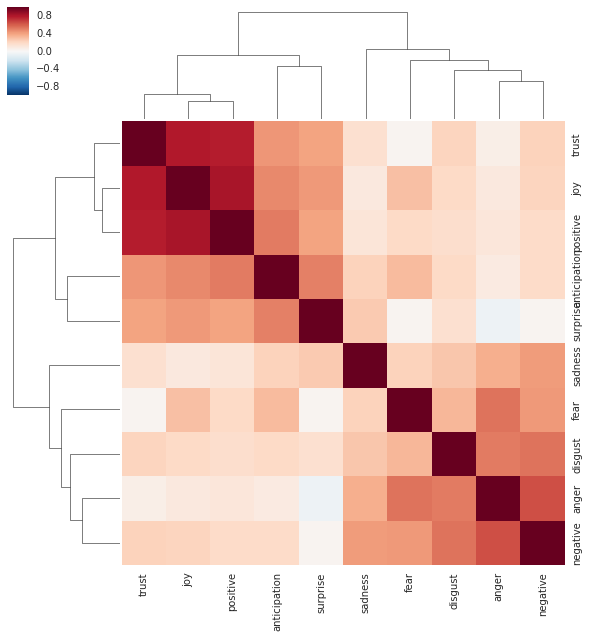

In [74]:
sns.clustermap(cor)

### Emotional signature
Finally, an emotional signature, result of the sum of all the emotions recorded can be plot acording to Plutchik's model.

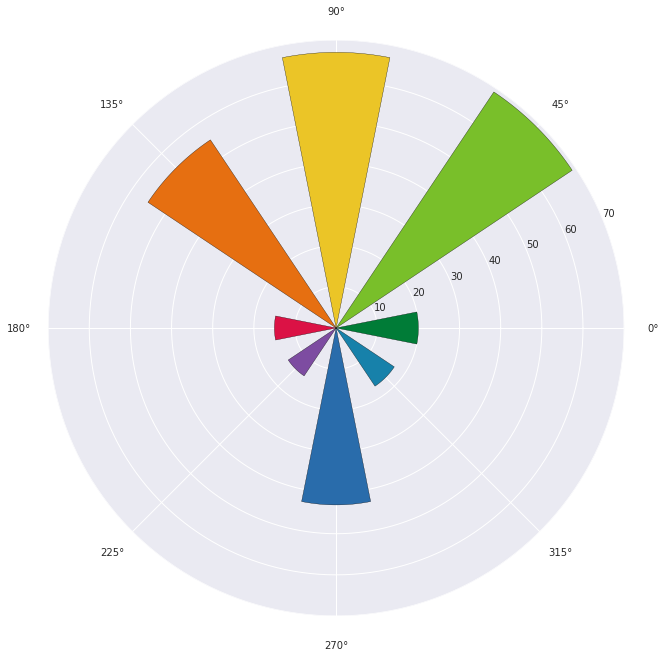

In [149]:
from matplotlib.pyplot import figure, show, rc

fig = figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

colors = ['#007C37','#79BF2A','#EBC527','#E66F11','#DB1245','#7D4CA1','#296CAB','#1781AA']

N = 8
theta = np.arange(0, 2*np.pi, 2*np.pi/N)-(np.pi/(2*N))
radii = df[['fear','trust','joy','anticipation','anger','disgust','sadness','surprise']].sum()
width = np.pi/N
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r,bar,c in zip(radii,bars,colors):
    bar.set_facecolor(c)
    bar.set_alpha(1)

show()